A program that reads and processes images for a Random Forest Classifier to classify as images as good, blacked-out, saturated, or blurry.

In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import sys
sys.path.insert(0, 'C:/Users/micha/github/uav-image-analysis/scripts/')
import fit_models

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df_train = pd.read_csv('/Users/micha/ea-applications/data/test-images.csv')

paths = '/Users/micha/ea-applications/data/training-test-images/Thermal/mytest/*MEDIA/'

train_images = fit_models.read_images(paths)

y = np.array(df_train['Label'])

y = df_train['Label'].values

X_train, X_test, y_train, y_test = train_test_split(train_images, y, random_state=42, test_size=0.4)

print(df_train.head())
print(X_train.shape)
print(y_train)

(431, 327680)
  Image Date     MEDIA Image_Name  Label Unnamed: 4
0  2/16/2019  100MEDIA   DJI_0001      2        NaN
1  2/16/2019  100MEDIA   DJI_0002      2        NaN
2  2/16/2019  100MEDIA   DJI_0003      2        NaN
3  2/16/2019  100MEDIA   DJI_0004      2        NaN
4  2/16/2019  100MEDIA   DJI_0005      2        NaN
(258, 327680)
[0 0 0 0 0 0 0 0 0 2 0 0 3 0 0 0 3 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 3 2 0 0 0
 0 2 3 0 2 0 3 0 0 2 0 0 0 0 2 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0
 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 3 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 3 0 0 0 0 0
 3 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 3 0 2 0 0 0 0
 1 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 2 0 0 0 0 0 0 1 2 0 0 0 0 0 0]


In [5]:
# Run random forest classifier
model = RandomForestClassifier()
model_logistic, probabilities, y_pred = fit_models.supervised_models(model, X_train, y_train, X_test, y_test)
print(probabilities)

             precision    recall  f1-score   support

          0       0.87      0.97      0.92       133
          1       0.80      1.00      0.89         8
          2       0.64      0.64      0.64        14
          3       0.00      0.00      0.00        18

avg / total       0.76      0.84      0.80       173

[0.  0.  0.  0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.3 0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
 0.3 0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.8 0.  0.  0.  0.  0.  0.  0.
 0.  0.1 0.  0.  0.  0.1 0.8 0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.
 0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.8 0.  0.  0.  0.  0.7 0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.3 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.7 0.  0.  0.  0.  0.  0.
 0.  0.  0.3 0.  0.  0.  0.  0.

In [6]:
print(confusion_matrix(y_test, y_pred))

[[129   0   4   0]
 [  0   8   0   0]
 [  4   0   9   1]
 [ 15   2   1   0]]


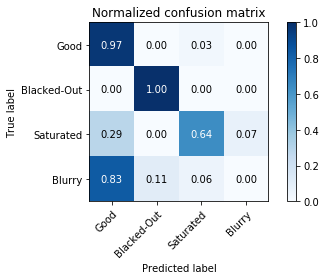

In [7]:
class_labels=['Good', 'Blacked-Out', 'Saturated', 'Blurry']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#fit_models.plot_confusion_matrix(y_test, y_pred, classes=class_labels,
                      #title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
fit_models.plot_confusion_matrix(y_test, y_pred, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model_boosting, open(filename, 'wb'))